0it [00:00, ?it/s]

/tmp/ipykernel_12453/1275458279.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


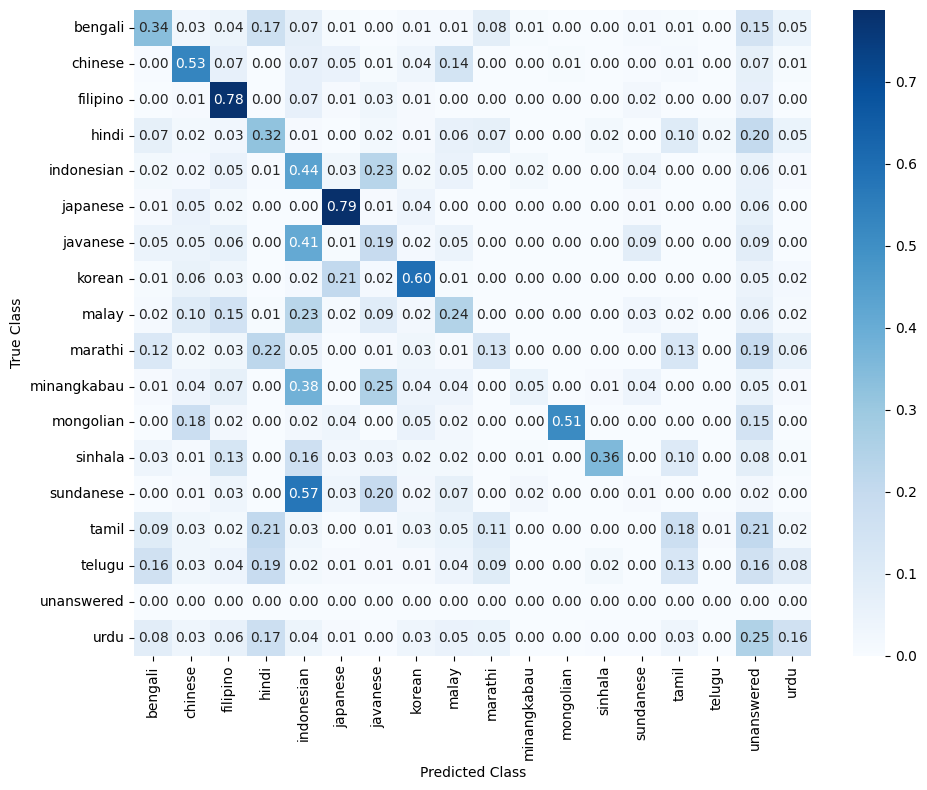

1it [00:02,  2.70s/it]/tmp/ipykernel_12453/1275458279.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


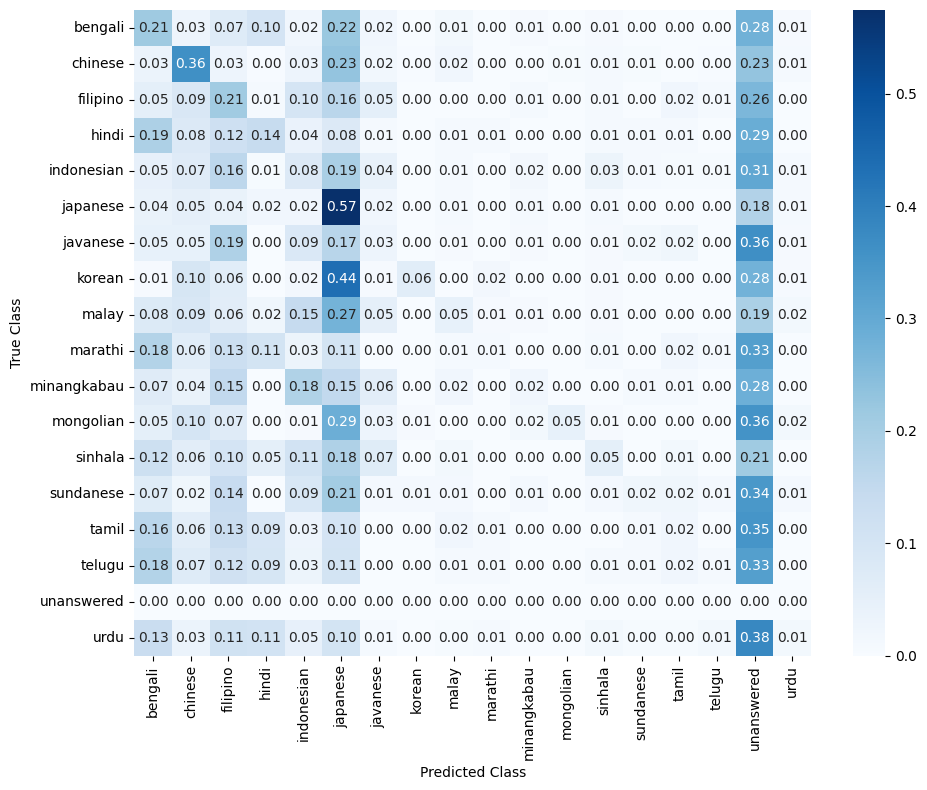

2it [00:05,  2.63s/it]/tmp/ipykernel_12453/1275458279.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


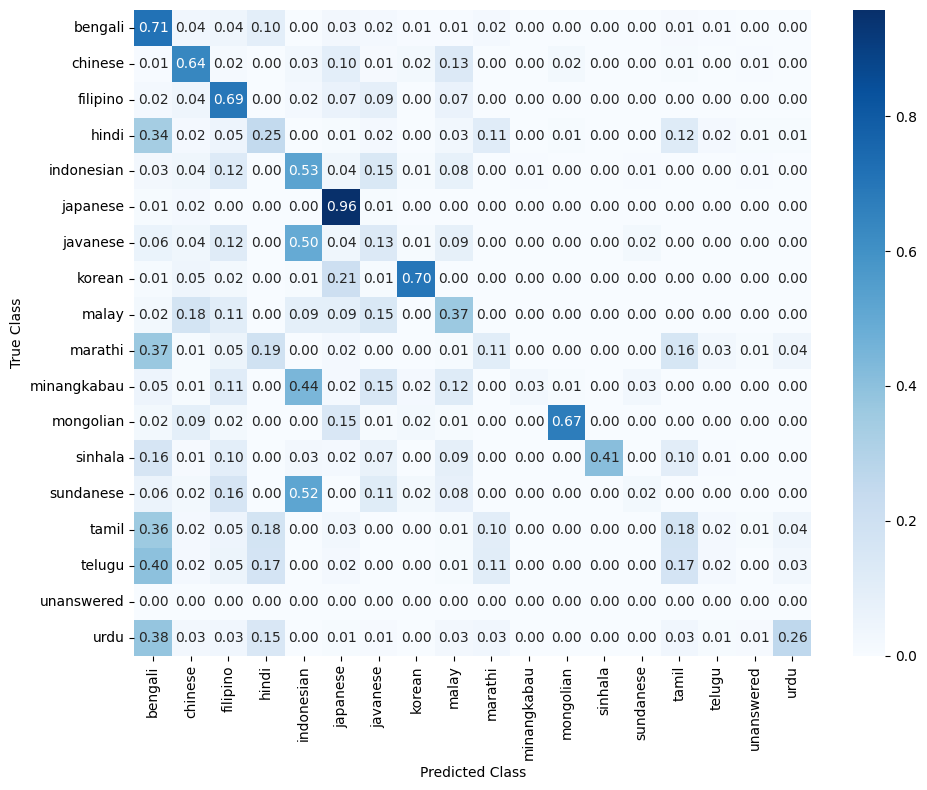

3it [00:08,  2.77s/it]/tmp/ipykernel_12453/1275458279.py:40: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows


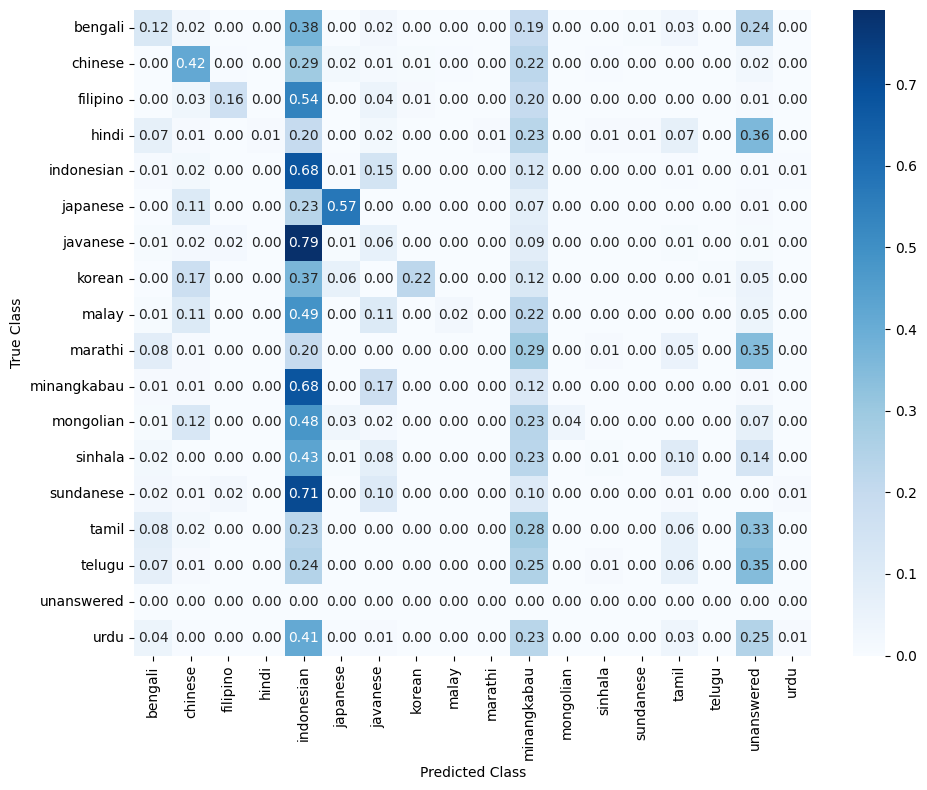

4it [00:10,  2.61s/it]


In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np


file_paths = [
    "llama_results.csv",
    "pixtral_results.csv",
    "qwen_results.csv",
    "llava_results.csv"
    ]


chart_names = [
    "Normalized Confusion Matrix for Llama-3.2-11B",
    "Normalized Confusion Matrix for Pixtral-12B",
    "Normalized Confusion Matrix for Qwen2-VL-7B",
    "Normalized Confusion Matrix for Llava-1.5-7B"
    ]


def plot_confusion_matrix(df, file_path, chart_name, true_col="Culture", pred_col="cleaned_output"):
    # Convert the true column to lowercase
    df[true_col] = df[true_col].str.lower()

    # Get unique classes from both true and predicted columns
    true_labels = df[true_col].unique()
    pred_labels = df[pred_col].unique()
    
    # Combine both to ensure all classes (including "unanswered") are included
    all_labels = sorted(set(true_labels).union(set(pred_labels)))

    # Generate the confusion matrix
    cm = confusion_matrix(df[true_col], df[pred_col], labels=all_labels)
    cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)  # Normalize by rows

    # Replace NaN values caused by division by zero with 0
    cm_normalized = np.nan_to_num(cm_normalized)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
        xticklabels=all_labels, yticklabels=all_labels
    )
    # plt.title(chart_name)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.tight_layout()
    plt.savefig(f"results//charts//{chart_name}.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution
    plt.show()
    # Save the heatmap as an image file


# Example application
# plot_confusion_matrix(df, "example.csv")



for index, file_path in tqdm(enumerate(file_paths)):
    df0 = pd.read_csv("results//processed_csvs//" + file_path)
    # Apply to example data
    # plot_normalized_bar_chart(df0)
    chart_name = chart_names[index]
    plot_confusion_matrix(df0, file_path, chart_name)
    # break

4it [00:00, 18.93it/s]


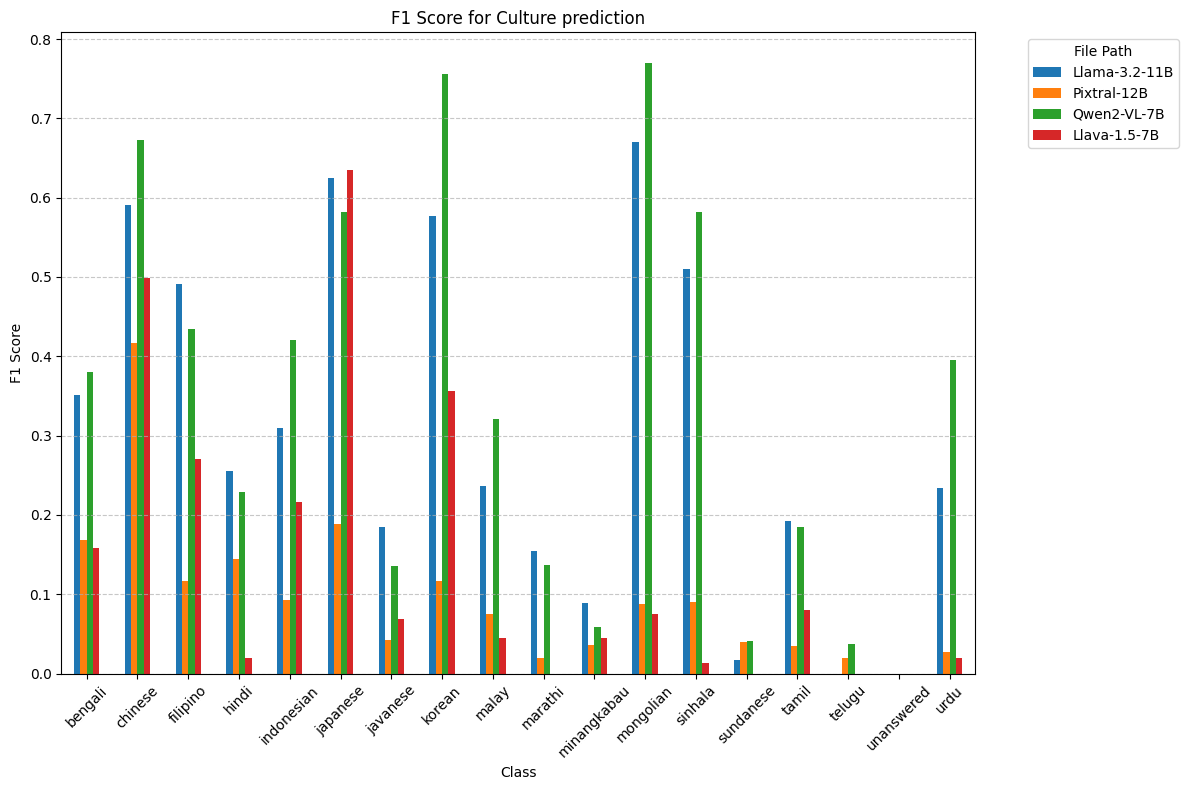

In [7]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

bar_names = [
    "Llama-3.2-11B",
    "Pixtral-12B",
    "Qwen2-VL-7B",
    "Llava-1.5-7B"
    ]

def combined_f1_score_bar_chart(file_paths, true_col="Culture", pred_col="cleaned_output"):
    aggregated_f1_scores = {}

    for index, file_path in tqdm(enumerate(file_paths)):
        # Load the CSV file
        df = pd.read_csv("results//processed_csvs//" + file_path)
        df[true_col] = df[true_col].str.lower()

        # Get unique classes
        classes = sorted(set(df[true_col].unique()).union(set(df[pred_col].unique())))

        # Calculate F1 scores
        _, _, f1_scores, _ = precision_recall_fscore_support(
            df[true_col], df[pred_col], labels=classes, zero_division=0
        )

        # Store F1 scores for the current file
        for class_name, f1_score in zip(classes, f1_scores):
            if class_name not in aggregated_f1_scores:
                aggregated_f1_scores[class_name] = {}
            # aggregated_f1_scores[class_name][file_path] = f1_score
            aggregated_f1_scores[class_name][bar_names[index]] = f1_score

    # Create a DataFrame for the aggregated F1 scores
    f1_scores_df = pd.DataFrame(aggregated_f1_scores).T.fillna(0)

    # Plot combined bar chart
    f1_scores_df.plot(kind="bar", figsize=(12, 8))
    plt.title("F1 Score for Culture prediction")
    plt.xlabel("Class")
    plt.ylabel("F1 Score")
    plt.xticks(rotation=45)
    plt.legend(title="File Path", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"results//charts//bar_plot.png", dpi=300, bbox_inches="tight")
    plt.show()

# Generate the combined F1 score bar chart
combined_f1_score_bar_chart(file_paths)